In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

Data analysis

In [25]:
data = pd.read_csv('countriesData.csv')
data.head()

,country,continent,year,lifeExpectancy,population,gdpPerCapita
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [26]:
data.drop(['continent'], axis=1)

data.corr()
#ВВП

,year,lifeExpectancy,population,gdpPerCapita
year,1.000000,0.435611,0.082308,0.227318
lifeExpectancy,0.435611,1.000000,0.064955,0.583706
population,0.082308,0.064955,1.000000,-0.025600
gdpPerCapita,0.227318,0.583706,-0.025600,1.000000


In [27]:
print(data.shape)
print('*' * 40)
data.info()

(1704, 6)
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
country           1704 non-null object
continent         1704 non-null object
year              1704 non-null int64
lifeExpectancy    1704 non-null float64
population        1704 non-null int64
gdpPerCapita      1704 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 66.6+ KB


In [28]:
def load_datasets(filename,data_columns,target_columns):
    
    df = pd.read_csv(filename, delimiter=',')
    X = df[data_columns]
    y = df[target_columns]
    return X,y

In [29]:
def split_datasets(X, y, test_size = 0.2):
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    
    return X_train, X_test, y_train, y_test

In [30]:
def normalize(X):

    mean = np.mean(X)
    std = np.std(X)
    X_new = (X-mean)/std
    
    return X_new, mean, std

In [31]:
def prepare_X(X):

    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    
    return X_new

In [32]:
def hypothesis(X, theta):
    
    h_thetha = np.dot(X,theta)

    return h_thetha

In [33]:
def cost_function(X, y, theta):
  
    m = X.shape[0]
    if m == 0:
        return None
    
    J = 1 / (2 * m) * sum((hypothesis(X,theta) - y)**2)
 
    return J

In [34]:
def derivative(X, y, thetha):
    m = X.shape[0]
    
    d_thetha = np.dot(X.T, hypothesis(X, thetha) - y) / m

    return d_thetha

In [44]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    
    
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):

        delta = derivative(X,y,theta)/m
        theta = theta - alpha * delta
        J = cost_function(X,y,theta)

        if print_J == True:
            print(J)
        J_history.append(J)
    plt.plot(J_history)
    plt.ylabel("Cost")
    plt.xlabel("Iteration")
    plt.show()
    return theta, J_history

In [45]:
data_columns = ["year", "population", "gdpPerCapita"]
target_column = "lifeExpectancy"
X, y = load_datasets('countriesData.csv',data_columns,target_column)
print('Dataset: X={}, y={}'.format(X.shape, y.shape))

X["population"]=X["population"].div(1000000)

Dataset: X=(1704, 3), y=(1704,)


In [46]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.1)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(1533, 3), y=(1533,)
Test set: X=(171, 3), y=(171,)


In [47]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)
theta = np.array([0, 0, 0, 0])

In [48]:
y = y_train[:]

In [49]:
print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))
print(cost_function(X, y, theta))

X: (1533, 4)
y: (1533,)
1845.5716005372512


In [50]:
alpha = 50
num_iters = 500

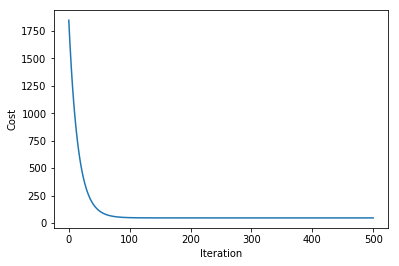

[59.37307367  3.96360323  0.70925042  6.59213012]
47.08914987679709


In [51]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print(new_theta)
print(cost_function(X, y, new_theta))

In [52]:
X_test_proc = (X_test-mean)/std
X_test_proc = prepare_X(X_test_proc)
y_test_pred = hypothesis(X_test_proc, new_theta)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100
res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print(cost_function(X_test_proc, y_test, new_theta))

      y_actual     y_pred        err
861     76.156  85.034259  11.657991
483     38.987  52.162177  33.793771
411     72.960  62.102749  14.881100
1153    40.080  50.747841  26.616370
1003    60.222  57.695724   4.194939
677     69.950  61.619194  11.909658
1544    58.061  57.992505   0.117971
1625    69.481  58.158252  16.296178
127     52.337  56.976089   8.863880
284     74.126  62.384578  15.839817
346     52.970  61.898153  16.855112
1685    51.386  54.929749   6.896332
510     44.916  55.618002  23.826702
658     68.565  61.665865  10.062182
1443    42.858  52.751051  23.083324
331     47.412  56.809861  19.821693
748     71.280  59.010126  17.213628
375     68.500  56.175446  17.992050
287     78.553  69.518511  11.501138
479     71.878  64.547897  10.197979
1359    67.946  54.853144  19.269502
1025    55.730  55.529517   0.359740
180     59.600  49.777556  16.480611
162     61.484  58.003367   5.661039
1117    38.598  49.839249  29.123916
804     43.158  49.143046  13.867756
1